In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY') 

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'Wx4yjD66AGS6RKWEkgDdS3APxjD663hl17ZXj',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'AP9kAE77W3sA6QenKVpaS7wXoP4qq7t1Alrax',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'GMkx9DLL6PsMZRExKm1eHPaGE6VxxPu1PXMqK',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "AP9kAE77W3sA6QenKVpaS7wXoP4qq7t1Alrax",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-04-15",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": fals

### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE
categories=[]
for transactions in transaction_response['transactions']:
    categories.append(transactions['category'])
categories

[['Payment', 'Credit Card'],
 ['Travel', 'Taxi'],
 ['Transfer', 'Debit'],
 ['Transfer', 'Deposit'],
 ['Recreation', 'Gyms and Fitness Centers'],
 ['Travel', 'Airlines and Aviation Services'],
 ['Food and Drink', 'Restaurants', 'Fast Food'],
 ['Food and Drink', 'Restaurants', 'Coffee Shop'],
 ['Food and Drink', 'Restaurants'],
 ['Transfer', 'Credit'],
 ['Travel', 'Airlines and Aviation Services'],
 ['Travel', 'Taxi'],
 ['Food and Drink', 'Restaurants'],
 ['Payment'],
 ['Food and Drink', 'Restaurants', 'Fast Food'],
 ['Shops', 'Sporting Goods'],
 ['Payment', 'Credit Card'],
 ['Travel', 'Taxi'],
 ['Transfer', 'Debit'],
 ['Transfer', 'Deposit'],
 ['Recreation', 'Gyms and Fitness Centers'],
 ['Travel', 'Airlines and Aviation Services'],
 ['Food and Drink', 'Restaurants', 'Fast Food'],
 ['Food and Drink', 'Restaurants', 'Coffee Shop'],
 ['Food and Drink', 'Restaurants'],
 ['Transfer', 'Credit'],
 ['Travel', 'Airlines and Aviation Services'],
 ['Travel', 'Taxi'],
 ['Food and Drink', 'Restaura

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [54]:
# YOUR CODE HERE
transactions_df=pd.DataFrame()
date=[]
name=[]
amount=[]
category=[]
for transactions in transaction_response['transactions']:
    date.append(transactions['date'])
    name.append(transactions['name'])
    amount.append(transactions['amount'])
    category.append(transactions['category'][0])
transactions_df['Date']=pd.to_datetime(pd.to_datetime(pd.Series(date)))
transactions_df['Name']=pd.Series(name)
transactions_df['Amount']=pd.Series(amount)
transactions_df['Category']=pd.Series(category)
transactions_df

,Date,Name,Amount,Category
0,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
1,2020-04-15,Uber,5.40,Travel
2,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
3,2020-04-14,CD DEPOSIT .INITIAL.,1000.00,Transfer
4,2020-04-13,Touchstone Climbing,78.50,Recreation
5,2020-04-13,United Airlines,-500.00,Travel
6,2020-04-12,McDonald's,12.00,Food and Drink
7,2020-04-12,Starbucks,4.33,Food and Drink
8,2020-04-11,SparkFun,89.40,Food and Drink
9,2020-04-10,INTRST PYMNT,-4.22,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
# YOUR CODE HERE
transactions_df.dtypes

Date        datetime64[ns]
Name                object
Amount             float64
Category            object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [13]:
income=client.Income.get(access_token)
income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'oCcOsj4Pe9eCW5T'}

In [60]:
# YOUR CODE HERE

income=client.Income.get(access_token)
last_year_gross_income=income['income']['last_year_income_before_tax']
curent_monthly_income=income['income']['income_streams'][0]['monthly_income']
projected_yearly_income=income['income']['projected_yearly_income_before_tax']
print(f'The previous years gross income :${last_year_gross_income}')
print(f'The current monthly income :${curent_monthly_income}')
print(f'The projected yearly income :${projected_yearly_income}')

The previous years gross income :$7285
The current monthly income :$500
The projected yearly income :$7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [53]:
#Calculate the total spending per category and print the results
food_and_drink=0
travel=0
shops=0
payment=0
transfer=0
recreation=0
for i in range (int(transactions_df.size/4)):
    if transactions_df.iloc[i,3] =='Payment':
        payment+=transactions_df.iloc[i,2]
    if transactions_df.iloc[i,3] =='Food and Drink':
        food_and_drink+=transactions_df.iloc[i,2]
    if transactions_df.iloc[i,3] =='Shops':
        shops+=transactions_df.iloc[i,2]
    if transactions_df.iloc[i,3] =='Travel':
        travel+=transactions_df.iloc[i,2] 
    if transactions_df.iloc[i,3] =='Transfer':
        transfer+=transactions_df.iloc[i,2]   
    if transactions_df.iloc[i,3] =='Recreation':
        recreation+=transactions_df.iloc[i,2]  
listOfSeries=[(payment,food_and_drink,shops,travel,transfer,recreation)]
total_spending_per_category=pd.DataFrame(listOfSeries,columns=['Payment','Food and Drink','Shops','Travel','Transfer','Recreation'])
total_spending_per_category


,Payment,Food and Drink,Shops,Travel,Transfer,Recreation
0,6310.5,3317.19,1500.0,35.19,20537.34,235.5


In [51]:
(total_spending_per_category).iloc[0].sum()

31935.719999999998

In [39]:
#finding percenteges for each category 
sum=(total_spending_per_category).iloc[0].sum()
sizes=[]
for i in range(total_spending_per_category.size):
    sizes.append(int(total_spending_per_category.iloc[0,i])/sum)   

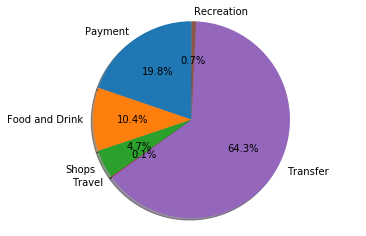

In [40]:
#"Spending Categories Pie Chart"
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Payment','Food and Drink','Shops','Travel','Transfer','Recreation'
  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [57]:
#Generate a bar chart with the number of transactions for each category
num_or_transactions=transactions_df.groupby('Category').count()
num_or_transactions.drop(columns=['Date','Name'],inplace=True)
num_or_transactions

,Amount
Category,
Food and Drink,15
Payment,6
Recreation,3
Shops,3
Transfer,9
Travel,12


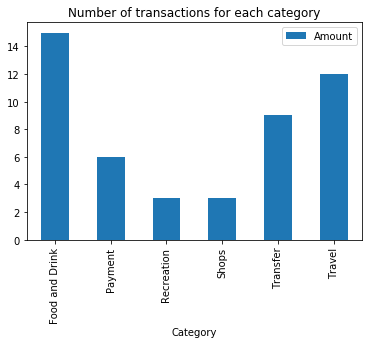

In [42]:
num_or_transactions.plot.bar(title="Number of transactions for each category")

### Spending Per Month Bar Chart

In [43]:
# YOUR CODE HERE
first_month = transactions_df[pd.to_datetime(transactions_df['Date']).dt.month == 1]
second_month = transactions_df[pd.to_datetime(transactions_df['Date']).dt.month == 2] 
third_month = transactions_df[pd.to_datetime(transactions_df['Date']).dt.month == 3]
forth_month = transactions_df[pd.to_datetime(transactions_df['Date']).dt.month == 4]


In [59]:
spending_firstmonth=first_month['Amount'].sum()
spending_secondmonth=second_month['Amount'].sum()
spending_thirdmonth=third_month['Amount'].sum()
spending_forthmonth=forth_month['Amount'].sum()
spending_per_month_df=pd.DataFrame()
spending_per_month_df['1']=pd.Series(spending_firstmonth)
spending_per_month_df['2']=pd.Series(spending_secondmonth)
spending_per_month_df['3']=pd.Series(spending_thirdmonth)
spending_per_month_df['4']=pd.Series(spending_forthmonth)
print(f'Toatl spending January: ${spending_firstmonth}')
print(f'Toatl spending Feburary: ${spending_secondmonth}')
print(f'Toatl spending March: ${spending_thirdmonth}')
print(f'Toatl spending April: ${spending_forthmonth}')


Toatl spending January: $4084.83
Toatl spending Feburary: $10145.24
Toatl spending March: $11145.24
Toatl spending April: $6560.409999999999


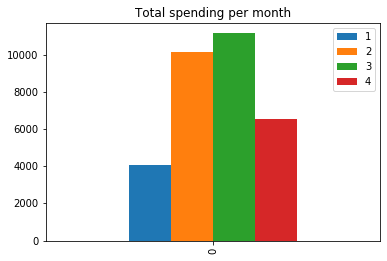

In [50]:
spending_per_month_df.plot.bar(title='Total spending per month')